### Scnario Hurricane Risk Analysis
This notebook 

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sp
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.spatial import distance
from scipy.stats import expon, lognorm
from sp.Intensity import Intensity
from sp.PFragility import plot_FC

In [282]:
# import Historical hurricane data (e.g.,HURDAT2)
data=pd.read_csv('hel_org.csv')

In [283]:
data.head()

,Sl,Time,Lat,Long,CP
0,1,0.0,31.60,78.30,943.00
1,2,0.5,31.66,78.33,942.17
2,3,1.0,31.72,78.35,941.33
3,4,1.5,31.78,78.38,940.50
4,5,2.0,31.83,78.40,939.67


#### Estimating Hazard Parameters

In [284]:
Lat1=list()
Long1=list()
CP1=list()
Δp1=list()
Rmax1=list()
B1=list()
ρ1=list()
Ω1=list()
for index, row in data.iterrows():
        Lat = row['Lat']
        Long = row['Long']
        CP = row['CP']
        Time= row['Time']
        Δp=1013-CP
        Rmax=np.exp(2.556-0.000050255*(float(Δp)**2)+0.042243032*float(Lat))
        B=1.881-0.00557*Rmax-0.01097*float(Lat)
        Lat1.append(Lat)
        Long1.append(Long)
        CP1.append(CP)
        Δp1.append(Δp)
        Rmax1.append(Rmax)
        B1.append(B)
        ρ=1.15
        Ω=0.00007292
        ρ1.append(ρ)
        Ω1.append(Ω)

In [285]:
Lat=list(Lat1)
Long= list(Long1)
CP= list(CP1)
Δp= list(Δp1)
Rmax=list(Rmax1)
B=list(B1)
ρ= list(ρ1)
Ω= list(Ω1)
pf = {'Lat':Lat,'Long':Long, 'CP':CP,'Δp':Δp,'Rmax':Rmax,'B':B,'ρ':ρ, 'Ω':Ω}
n=pd.DataFrame(pf)

In [286]:
n.head(3)

,Lat,Long,CP,Δp,Rmax,B,ρ,Ω
0,31.60,78.30,943.00,70.00,38.268623,1.321192,1.15,0.000073
1,31.66,78.33,942.17,70.83,38.141031,1.321244,1.15,0.000073
2,31.72,78.35,941.33,71.67,38.008495,1.321324,1.15,0.000073


In [287]:
# importing building invetory data
blg=pd.read_csv('sample_buildings.csv')

In [288]:
blg.head()

,OBJECTID,x,y,Year,STRUCTURET,id,taxval,landuse,yearbuilt,storey,Structures,StrucET,Type,type,Area_m2,Area_ft2
0,64590,77.211412,34.669224,2016,Hard Board (Hardy board or pla,37754,131940,Residential,2004,1,Single Family,Hard Board (Hardy board or pla,Building Modified,A58,2219.860665,11775.676390
1,120592,77.373893,34.767879,2006,Cedar/Redwood/Cypress,45542,133340,Residential,1988,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A14,2783.299933,9727.959884
2,89645,77.160145,34.682143,2006,Cedar/Redwood/Cypress,53669,492240,Waterfront River/Creek,2001,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A62,3483.491410,21968.291680
3,47967,77.443826,34.800179,2016,Aluminum/Vinyl,68961,167250,Residential,2007,1,Single Family,Aluminum/Vinyl,Building New,A62,2672.812928,10502.671570
4,59405,77.541601,34.897484,2016,Aluminum/Vinyl,17408,46720,Residential,1960,1,Single Family,Aluminum/Vinyl,Building New,A14,87.815423,5503.109841


In [289]:
#Gradient Wind Speeds Estimation
a1=list()
r1=list()
f1=list()
Vg1=list()
Vmph=list()
for index, row in n.iterrows():
    Lat_HE = row['Lat']*3.141592654/180
    Long_HE = row['Long']*3.141592654/180
    ρ = row['ρ']
    B = row['B']
    Rmax = row['Rmax']*1000
    CP = row['CP']
    Δp = row['Δp']*100
    Vg11=list()
    Vmph1=list()
    Vg1.append(Vg11)
    Vmph.append(Vmph1)
    for index, row in blg.iterrows():
        Lat = row['y']
        Long = row['x']
        Lat_rad = Lat*3.141592654/180
        Long_rad= Long*3.141592654/180
        delLat=Lat_HE-Lat_rad
        delLong=Long_HE-Long_rad
        a=np.sin(delLat/2)**2+np.cos(Lat_HE)*np.cos(Lat_rad)*np.sin(delLong/2)**2
        rr=2*6373*np.arcsin(np.sqrt(a))
        r=rr*1000
        f=2*0.000073*np.sin(Lat_rad)
        Vg=float(np.sqrt((((Rmax/r)**B)*((B*Δp*np.exp(-(Rmax/r)**B))/ρ))+((r**2)*(f**2)*0.25))-(r*f/2))
        V=Vg*2.2369362920544
        a1.append(a)
        r1.append(r)
        f1.append(f)
        Vg11.append(Vg)
        Vmph1.append(V)

In [290]:
# Converting Gradient wind Speeds to Surface Wind Speeds
VG=pd.DataFrame(Vmph)
VG1=pd.DataFrame(Vmph)*1.287
Vg=VG.T

Text(0, 0.5, 'Wind Speed(mph)')

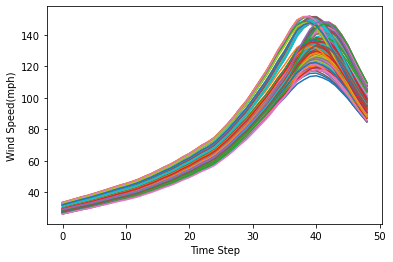

In [293]:
#Wind Speed Trajectories
VG1.plot.line(legend=None)
plt.xlabel('Time Step')
plt.ylabel('Wind Speed(mph)')

In [294]:
V3s=Vg.max(axis=1)*1.287

In [296]:
# Creating DataFrame with Wind Speeds
V3=list(blg.id)
vv= list(V3s.values)
pf = {'ind':V3,'mph':vv}
ws=pd.DataFrame(pf)

In [297]:
ws.head()

,ind,mph
0,37754,146.736855
1,45542,134.299058
2,53669,147.421464
3,68961,129.690412
4,17408,119.759260


In [299]:
ws.shape

(256, 2)

In [300]:
blg.shape

(256, 16)

In [301]:
# Adding Estiamted Wind Speed to Building Data
BlgW=blg.merge(ws, left_on='id', right_on='ind')

In [302]:
BlgW.head()

,OBJECTID,x,y,Year,STRUCTURET,id,taxval,landuse,yearbuilt,storey,Structures,StrucET,Type,type,Area_m2,Area_ft2,ind,mph
0,64590,77.211412,34.669224,2016,Hard Board (Hardy board or pla,37754,131940,Residential,2004,1,Single Family,Hard Board (Hardy board or pla,Building Modified,A58,2219.860665,11775.676390,37754,146.736855
1,120592,77.373893,34.767879,2006,Cedar/Redwood/Cypress,45542,133340,Residential,1988,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A14,2783.299933,9727.959884,45542,134.299058
2,89645,77.160145,34.682143,2006,Cedar/Redwood/Cypress,53669,492240,Waterfront River/Creek,2001,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A62,3483.491410,21968.291680,53669,147.421464
3,47967,77.443826,34.800179,2016,Aluminum/Vinyl,68961,167250,Residential,2007,1,Single Family,Aluminum/Vinyl,Building New,A62,2672.812928,10502.671570,68961,129.690412
4,59405,77.541601,34.897484,2016,Aluminum/Vinyl,17408,46720,Residential,1960,1,Single Family,Aluminum/Vinyl,Building New,A14,87.815423,5503.109841,17408,119.759260


In [303]:
BlgW.drop(['ind'], axis=1, inplace=True)

In [304]:
BlgW.shape

(256, 17)

In [305]:
BlgW.head()

,OBJECTID,x,y,Year,STRUCTURET,id,taxval,landuse,yearbuilt,storey,Structures,StrucET,Type,type,Area_m2,Area_ft2,mph
0,64590,77.211412,34.669224,2016,Hard Board (Hardy board or pla,37754,131940,Residential,2004,1,Single Family,Hard Board (Hardy board or pla,Building Modified,A58,2219.860665,11775.676390,146.736855
1,120592,77.373893,34.767879,2006,Cedar/Redwood/Cypress,45542,133340,Residential,1988,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A14,2783.299933,9727.959884,134.299058
2,89645,77.160145,34.682143,2006,Cedar/Redwood/Cypress,53669,492240,Waterfront River/Creek,2001,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A62,3483.491410,21968.291680,147.421464
3,47967,77.443826,34.800179,2016,Aluminum/Vinyl,68961,167250,Residential,2007,1,Single Family,Aluminum/Vinyl,Building New,A62,2672.812928,10502.671570,129.690412
4,59405,77.541601,34.897484,2016,Aluminum/Vinyl,17408,46720,Residential,1960,1,Single Family,Aluminum/Vinyl,Building New,A14,87.815423,5503.109841,119.759260


In [306]:
BlgW.shape

(256, 17)

### Generalized Scenario Wind Speeds Curve

In [315]:
#Rmax at Landfall
Rmax=33.29969958*1000
B=2
Δp=63*100
ρ=1.15
Ω=0.00007292
φ=27.2*3.141592654/180
f=6.66632E-05

Rw=31.52032052*1000
Bw=2.5
Δpw=63*100
φb=25.9*3.141592654/180

In [316]:
# Preparing Hazard Curve
rr=[]
VG=[]
VGw=[]
for r in range(1, 400, 1):
    Vg=float(np.sqrt((((Rmax/(r*1000))**B)*((B*Δp*np.exp(-(Rmax/(r*1000))**B))/ρ))+((r**2)*(f**2)*0.25))-((r*1000)*f/2))
    Vgw=float(np.sqrt((((Rw/(r*1000))**Bw)*((Bw*Δpw*np.exp(-(Rw/(r*1000))**Bw))/ρ))+((r**2)*(f**2)*0.25))-((r*1000)*f/2))
    rr.append(r)
    VG.append(Vg)
    VGw.append(Vgw)

Text(0, 0.5, 'Wind Speed (m/s)')

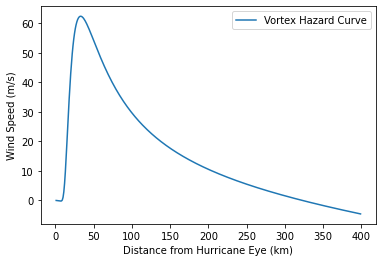

In [317]:
plt.plot(rr,VG,label='Vortex Hazard Curve')
plt.legend()
plt.xlabel('Distance from Hurricane Eye (km)')
plt.ylabel('Wind Speed (m/s)')

### Damage Simulation

In [318]:
from pyproj import Proj
from pyproj import Proj, transform

In [319]:
np.random.seed(1234)

In [320]:
BlgW.head(3)

,OBJECTID,x,y,Year,STRUCTURET,id,taxval,landuse,yearbuilt,storey,Structures,StrucET,Type,type,Area_m2,Area_ft2,mph
0,64590,77.211412,34.669224,2016,Hard Board (Hardy board or pla,37754,131940,Residential,2004,1,Single Family,Hard Board (Hardy board or pla,Building Modified,A58,2219.860665,11775.676390,146.736855
1,120592,77.373893,34.767879,2006,Cedar/Redwood/Cypress,45542,133340,Residential,1988,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A14,2783.299933,9727.959884,134.299058
2,89645,77.160145,34.682143,2006,Cedar/Redwood/Cypress,53669,492240,Waterfront River/Creek,2001,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A62,3483.491410,21968.291680,147.421464


In [321]:
node = BlgW

In [322]:
node.head(3)

,OBJECTID,x,y,Year,STRUCTURET,id,taxval,landuse,yearbuilt,storey,Structures,StrucET,Type,type,Area_m2,Area_ft2,mph
0,64590,77.211412,34.669224,2016,Hard Board (Hardy board or pla,37754,131940,Residential,2004,1,Single Family,Hard Board (Hardy board or pla,Building Modified,A58,2219.860665,11775.676390,146.736855
1,120592,77.373893,34.767879,2006,Cedar/Redwood/Cypress,45542,133340,Residential,1988,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A14,2783.299933,9727.959884,134.299058
2,89645,77.160145,34.682143,2006,Cedar/Redwood/Cypress,53669,492240,Waterfront River/Creek,2001,1,Single Family,Cedar/Redwood/Cypress,Building Existing,A62,3483.491410,21968.291680,147.421464


In [323]:
node.shape

(256, 17)

In [324]:
# classify structure types
A10 = node[node['type']=='A10']
A14 = node[node['type']=='A14']
A18 = node[node['type']=='A18']
A22 = node[node['type']=='A22']
A26 = node[node['type']=='A26']
A30 = node[node['type']=='A30']
A50 = node[node['type']=='A50']
A54 = node[node['type']=='A54']
A56 = node[node['type']=='A56']
A58 = node[node['type']=='A58']
A62 = node[node['type']=='A62']
B32 = node[node['type']=='B32']
B35 = node[node['type']=='B35']
B37 = node[node['type']=='B37']
C14 = node[node['type']=='C14']
C24 = node[node['type']=='C24']
C25 = node[node['type']=='C25']
F16 = node[node['type']=='F16']
D10 = node[node['type']=='D10']
G4 = node[node['type']=='G4']
E6 = node[node['type']=='E6']
E7 = node[node['type']=='E7']
E8 = node[node['type']=='E8']

In [325]:
node.tail(3)

,OBJECTID,x,y,Year,STRUCTURET,id,taxval,landuse,yearbuilt,storey,Structures,StrucET,Type,type,Area_m2,Area_ft2,mph
253,91243,77.504198,34.693078,2006,Aluminum/Vinyl,65909,195000,Residential,2005,2,Single Family,Aluminum/Vinyl,Building Existing,A26,1804.480560,22025.07111,135.164694
254,24691,77.189520,34.652543,2016,Hard Board (Hardy board or pla,74194,163940,Residential,2008,1,Single Family,Hard Board (Hardy board or pla,Building New,A58,2206.202757,48215.88262,148.511963
255,45516,77.361602,34.783840,2016,Aluminum/Vinyl,6222,112340,Residential,1974,1,Single Family,Aluminum/Vinyl,Building New,A14,162.343681,13824.10037,133.428417


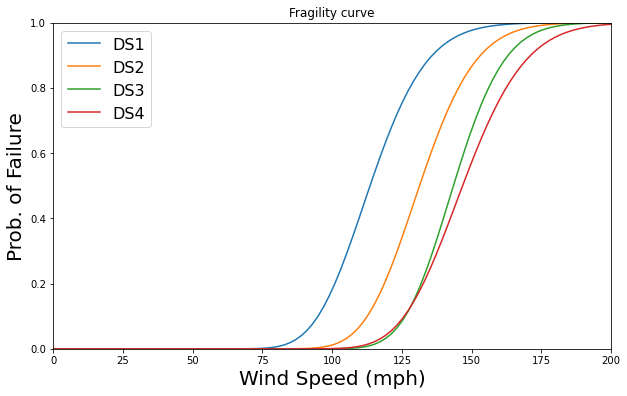

In [326]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=113.57)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=131.31)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.10, scale=143.45)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.12, scale=146.74)})
plot_FC(node_FC, xlabel='Wind Speed(mph)', ylabel='Prob. of Exceedance',fill=False,xmax=200)
plt.xlabel('Wind Speed (mph)',size=20)
plt.ylabel('Prob. of Failure',size=20)
plt.legend(prop={'size':16},loc='upper left')
plt.plot(linewidth=2.0)
plt.grid(False)
idi=node[(node.type=='A10')].id
mphi=node[(node.type=='A10')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A10 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A10)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA10= node_damage_state.map(node_damage_state_map)
id_valA10=df.Id

In [327]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.13, scale=118.22)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=138.69)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=153.49)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.11, scale=158.66)})
idi=node[(node.type=='A14')].id
mphi=node[(node.type=='A14')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A14 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A14)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA14= node_damage_state.map(node_damage_state_map)
id_valA14=df.Id
node_damage_valA14.value_counts()

1    17
2    10
0     9
4     3
3     2
dtype: int64

In [328]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=103.10)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=118.60)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=133.47)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.11, scale=146.44)})
idi=node[(node.type=='A18')].id
mphi=node[(node.type=='A18')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A18 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A18)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA18= node_damage_state.map(node_damage_state_map)
id_valA18=df.Id
node_damage_valA18.value_counts()

3    2
2    1
dtype: int64

In [329]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=106.63)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=126.51)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=140.68)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.11, scale=157.88)})
idi=node[(node.type=='A22')].id
mphi=node[(node.type=='A22')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A22 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A22)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA22= node_damage_state.map(node_damage_state_map)
id_valA22=df.Id
node_damage_valA22.value_counts()

3    2
2    1
dtype: int64

In [330]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=102.89)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=118.10)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=129.18)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.12, scale=133.30)})
idi=node[(node.type=='A26')].id
mphi=node[(node.type=='A26')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A26 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A26)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA26= node_damage_state.map(node_damage_state_map)
id_valA26=df.Id
node_damage_valA26.value_counts()

4    12
2     9
3     5
1     2
dtype: int64

In [331]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=106.66)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=126.09)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=137.42)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.12, scale=142.53)})
idi=node[(node.type=='A30')].id
mphi=node[(node.type=='A30')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A30 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A30)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA30= node_damage_state.map(node_damage_state_map)
id_valA30=df.Id
node_damage_valA30.value_counts()

2    13
1     9
4     6
3     2
0     2
dtype: int64

In [332]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=113.63)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=136.38)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=158.00)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.11, scale=176.68)})
idi=node[(node.type=='A50')].id
mphi=node[(node.type=='A50')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A50 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A50)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA50= node_damage_state.map(node_damage_state_map)
id_valA50=df.Id
node_damage_valA50.value_counts()

1    1
dtype: int64

In [333]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.13, scale=117.64)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=139.82)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=160.69)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.10, scale=179.27)})
idi=node[(node.type=='A54')].id
mphi=node[(node.type=='A54')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A54 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A54)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA54= node_damage_state.map(node_damage_state_map)
id_valA54=df.Id
node_damage_valA54.value_counts()

Series([], dtype: int64)

In [334]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.13, scale=117.64)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=139.82)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=160.69)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.10, scale=179.27)})
idi=node[(node.type=='A56')].id
mphi=node[(node.type=='A56')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A56 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A56)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA56= node_damage_state.map(node_damage_state_map)
id_valA56=df.Id
node_damage_valA56.value_counts()

3    1
dtype: int64

In [335]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=113.26)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=134.56)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=144.66)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.12, scale=146.69)})
idi=node[(node.type=='A58')].id
mphi=node[(node.type=='A58')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A58 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A58)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA58= node_damage_state.map(node_damage_state_map)
id_valA58=df.Id
node_damage_valA58.value_counts()

1    17
2     8
4     7
0     5
dtype: int64

In [336]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=117.68)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=139.27)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=153.16)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.12, scale=157.78)})
idi=node[(node.type=='A62')].id
mphi=node[(node.type=='A62')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_A62 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_A62)
node_damage_state_map = node_FC.get_level_map()
node_damage_valA62= node_damage_state.map(node_damage_state_map)
id_valA62=df.Id
node_damage_valA62.value_counts()

1    14
2     5
4     4
0     4
3     2
dtype: int64

In [337]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.14, scale=139.90)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.11, scale=157.79)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.10, scale=171.78)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.10, scale=173.71)})
idi=node[(node.type=='B32')].id
mphi=node[(node.type=='B32')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_B32 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_B32)
node_damage_state_map = node_FC.get_level_map()
node_damage_valB32= node_damage_state.map(node_damage_state_map)
id_valB32=df.Id
node_damage_valB32.value_counts()

0    13
1     7
2     1
4     1
dtype: int64

In [338]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.13, scale=127.66)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=134.68)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=149.38)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.13, scale=156.24)})
idi=node[(node.type=='B35')].id
mphi=node[(node.type=='B35')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_B35 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_B35)
node_damage_state_map = node_FC.get_level_map()
node_damage_valB35= node_damage_state.map(node_damage_state_map)
id_valB35=df.Id
node_damage_valB35.value_counts()

2    3
4    1
0    1
dtype: int64

In [339]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.13, scale=127.31)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=133.31)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.12, scale=145.17)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.13, scale=148.34)})
idi=node[(node.type=='B37')].id
mphi=node[(node.type=='B37')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_B37 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_B37)
node_damage_state_map = node_FC.get_level_map()
node_damage_valB37= node_damage_state.map(node_damage_state_map)
id_valB37=df.Id
node_damage_valB37.value_counts()

2    1
dtype: int64

In [340]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.13, scale=113.93)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=137.45)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=161.16)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.06, scale=185.76)})
idi=node[(node.type=='C14')].id
mphi=node[(node.type=='C14')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_C14 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_C14)
node_damage_state_map = node_FC.get_level_map()
node_damage_valC14= node_damage_state.map(node_damage_state_map)
id_valC14=df.Id
node_damage_valC14.value_counts()

3    1
1    1
dtype: int64

In [341]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.13, scale=104.84)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.12, scale=126.33)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.11, scale=149.14)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.06, scale=160.38)})
idi=node[(node.type=='C24')].id
mphi=node[(node.type=='C24')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_C24 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_C24)
node_damage_state_map = node_FC.get_level_map()
node_damage_valC24= node_damage_state.map(node_damage_state_map)
id_valC24=df.Id
node_damage_valC24.value_counts()

3    1
dtype: int64

In [342]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.13, scale=100.16)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.11, scale=119.90)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.09, scale=142.55)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.11, scale=148.21)})
idi=node[(node.type=='C25')].id
mphi=node[(node.type=='C25')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_C25 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_C25)
node_damage_state_map = node_FC.get_level_map()
node_damage_valC25= node_damage_state.map(node_damage_state_map)
id_valC25=df.Id
node_damage_valC25.value_counts()

4    1
dtype: int64

In [343]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.19, scale=120.37)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.19, scale=132.80)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.17, scale=144.93)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.15, scale=151.33)})
idi=node[(node.type=='D10')].id
mphi=node[(node.type=='D10')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_D10 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_D10)
node_damage_state_map = node_FC.get_level_map()
node_damage_valD10= node_damage_state.map(node_damage_state_map)
id_valD10=df.Id
node_damage_valD10.value_counts()

3    1
dtype: int64

In [344]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.16, scale=128.76)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.15, scale=130.61)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.15, scale=133.78)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.14, scale=151.04)})
idi=node[(node.type=='E6')].id
mphi=node[(node.type=='E6')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_E6 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_E6)
node_damage_state_map = node_FC.get_level_map()
node_damage_valE6= node_damage_state.map(node_damage_state_map)
id_valE6=df.Id
node_damage_valE6.value_counts()

4    1
dtype: int64

In [345]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.16, scale=120.12)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.16, scale=121.59)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.15, scale=132.01)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.09, scale=178.87)})
idi=node[(node.type=='E7')].id
mphi=node[(node.type=='E7')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_E7 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_E7)
node_damage_state_map = node_FC.get_level_map()
node_damage_valE7= node_damage_state.map(node_damage_state_map)
id_valE7=df.Id
node_damage_valE7.value_counts()

Series([], dtype: int64)

In [346]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.16, scale=103.39)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.16, scale=103.98)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.15, scale=119.89)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.09, scale=169.27)})
idi=node[(node.type=='E8')].id
mphi=node[(node.type=='E8')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_E8 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_E8)
node_damage_state_map = node_FC.get_level_map()
node_damage_valE8= node_damage_state.map(node_damage_state_map)
id_valE8=df.Id
node_damage_valE8.value_counts()

Series([], dtype: int64)

In [347]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.16, scale=102.51)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.16, scale=109.71)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.15, scale=119.93)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.09, scale=187.27)})
idi=node[(node.type=='F16')].id
mphi=node[(node.type=='F16')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_F16 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_F16)
node_damage_state_map = node_FC.get_level_map()
node_damage_valF16= node_damage_state.map(node_damage_state_map)
id_valF16=df.Id
node_damage_valF16.value_counts()

3    5
2    3
1    1
0    1
dtype: int64

In [348]:
np.random.seed(1234)
node_FC=sp.Fragility()
node_FC.add_dam_state('DS1', 1, {'Default': lognorm(0.16, scale=105.45)})  
node_FC.add_dam_state('DS2', 2, {'Default': lognorm(0.16, scale=111.09)})
node_FC.add_dam_state('DS3', 3, {'Default': lognorm(0.15, scale=118.92)})
node_FC.add_dam_state('DS4', 4, {'Default': lognorm(0.09, scale=136.03)})
idi=node[(node.type=='G4')].id
mphi=node[(node.type=='G4')].mph
d = {'Id':idi,'mph':mphi}
df=pd.DataFrame(d)
df.set_index('Id');
node_Pr_G4 = node_FC.cdf_probability(df['mph'])
node_damage_state = node_FC.sample_damage_state(node_Pr_G4)
node_damage_state_map = node_FC.get_level_map()
node_damage_valG4= node_damage_state.map(node_damage_state_map)
id_valG4=df.Id
node_damage_valG4.value_counts()

Series([], dtype: int64)

In [349]:
idd=id_valA10.append(id_valA14).append(id_valA18).append(id_valA22).append(id_valA26).append(id_valA30).append(id_valA50).append(id_valA54).append(id_valA56).append(id_valA58).append(id_valA62).append(id_valB32).append(id_valB35).append(id_valB37).append(id_valC14).append(id_valC24).append(id_valC25).append(id_valD10).append(id_valE6).append(id_valE7).append(id_valE8).append(id_valF16).append(id_valG4)

In [350]:
rcc=node_damage_valA10.append(node_damage_valA14).append(node_damage_valA18).append(node_damage_valA22).append(node_damage_valA26).append(node_damage_valA30).append(node_damage_valA50).append(node_damage_valA54).append(node_damage_valA56).append(node_damage_valA58).append(node_damage_valA62).append(node_damage_valB32).append(node_damage_valB35).append(node_damage_valB37).append(node_damage_valC14).append(node_damage_valC24).append(node_damage_valC25).append(node_damage_valD10).append(node_damage_valE6).append(node_damage_valE7).append(node_damage_valE8).append(node_damage_valF16).append(node_damage_valG4)

In [351]:
# Pf=node_Pr_A10.append(node_Pr_A14).append(node_Pr_A18).append(node_Pr_A22).append(node_Pr_A26).append(node_Pr_A30).append(node_Pr_A50).append(node_Pr_A54).append(node_Pr_A56).append(node_Pr_A58).append(node_Pr_A62).append(node_Pr_B32).append(node_Pr_B35).append(node_Pr_B37).append(node_Pr_C14).append(node_Pr_C24).append(node_Pr_C25).append(node_Pr_D10).append(node_Pr_E6).append(node_Pr_E7).append(node_Pr_E8).append(node_Pr_F16).append(node_Pr_G4)

In [352]:
# DD=node_Pr_A10.DS1

In [353]:
DS1=node_Pr_A10.DS1.append(node_Pr_A14.DS1).append(node_Pr_A18.DS1).append(node_Pr_A22.DS1).append(node_Pr_A26.DS1).append(node_Pr_A30.DS1).append(node_Pr_A50.DS1).append(node_Pr_A54.DS1).append(node_Pr_A56.DS1).append(node_Pr_A58.DS1).append(node_Pr_A62.DS1).append(node_Pr_B32.DS1).append(node_Pr_B35.DS1).append(node_Pr_B37.DS1).append(node_Pr_C14.DS1).append(node_Pr_C24.DS1).append(node_Pr_C25.DS1).append(node_Pr_D10.DS1).append(node_Pr_E6.DS1).append(node_Pr_E7.DS1).append(node_Pr_E8.DS1).append(node_Pr_F16.DS1).append(node_Pr_G4.DS1)

In [354]:
DS2=node_Pr_A10.DS2.append(node_Pr_A14.DS2).append(node_Pr_A18.DS2).append(node_Pr_A22.DS2).append(node_Pr_A26.DS2).append(node_Pr_A30.DS2).append(node_Pr_A50.DS2).append(node_Pr_A54.DS2).append(node_Pr_A56.DS2).append(node_Pr_A58.DS2).append(node_Pr_A62.DS2).append(node_Pr_B32.DS2).append(node_Pr_B35.DS2).append(node_Pr_B37.DS2).append(node_Pr_C14.DS2).append(node_Pr_C24.DS2).append(node_Pr_C25.DS2).append(node_Pr_D10.DS2).append(node_Pr_E6.DS2).append(node_Pr_E7.DS2).append(node_Pr_E8.DS2).append(node_Pr_F16.DS2).append(node_Pr_G4.DS2)

In [355]:
DS3=node_Pr_A10.DS3.append(node_Pr_A14.DS3).append(node_Pr_A18.DS3).append(node_Pr_A22.DS3).append(node_Pr_A26.DS3).append(node_Pr_A30.DS3).append(node_Pr_A50.DS3).append(node_Pr_A54.DS3).append(node_Pr_A56.DS3).append(node_Pr_A58.DS3).append(node_Pr_A62.DS3).append(node_Pr_B32.DS3).append(node_Pr_B35.DS3).append(node_Pr_B37.DS3).append(node_Pr_C14.DS3).append(node_Pr_C24.DS3).append(node_Pr_C25.DS3).append(node_Pr_D10.DS3).append(node_Pr_E6.DS3).append(node_Pr_E7.DS3).append(node_Pr_E8.DS3).append(node_Pr_F16.DS3).append(node_Pr_G4.DS3)

In [356]:
DS4=node_Pr_A10.DS4.append(node_Pr_A14.DS4).append(node_Pr_A18.DS4).append(node_Pr_A22.DS4).append(node_Pr_A26.DS4).append(node_Pr_A30.DS4).append(node_Pr_A50.DS4).append(node_Pr_A54.DS4).append(node_Pr_A56.DS4).append(node_Pr_A58.DS4).append(node_Pr_A62.DS4).append(node_Pr_B32.DS4).append(node_Pr_B35.DS4).append(node_Pr_B37.DS4).append(node_Pr_C14.DS4).append(node_Pr_C24.DS4).append(node_Pr_C25.DS4).append(node_Pr_D10.DS4).append(node_Pr_E6.DS4).append(node_Pr_E7.DS4).append(node_Pr_E8.DS4).append(node_Pr_F16.DS4).append(node_Pr_G4.DS4)

In [371]:
sim_data = {'idd':idd,'DS1':DS1,'DS2':DS2,'DS3':DS3,'DS4':DS4, 'dmg':rcc}
PDD=pd.DataFrame(sim_data)

In [372]:
DS=PDD.sort_index()

In [376]:
#Damage States Probabilities
DS.head(3)

,idd,DS1,DS2,DS3,DS4,dmg
0,37754,0.96782,0.764829,0.551554,0.501062,4
1,45542,0.836688,0.394311,0.112328,0.064835,2
2,53669,0.946244,0.682253,0.364236,0.285736,4


In [377]:
node.shape

(256, 17)

In [378]:
DS.shape

(256, 6)

In [382]:
#Joining Damage States Data to Building Inventory
RA_Out=node.merge(DS, left_on='id', right_on='idd')

In [383]:
RA_Out.shape

(256, 23)

In [384]:
RA_Out.to_csv('RA_Output.csv')

In [385]:
RA_Out.head()

,OBJECTID,x,y,Year,STRUCTURET,id,taxval,landuse,yearbuilt,storey,...,type,Area_m2,Area_ft2,mph,idd,DS1,DS2,DS3,DS4,dmg
0,64590,77.211412,34.669224,2016,Hard Board (Hardy board or pla,37754,131940,Residential,2004,1,...,A58,2219.860665,11775.676390,146.736855,37754,0.96782,0.764829,0.551554,0.501062,4
1,120592,77.373893,34.767879,2006,Cedar/Redwood/Cypress,45542,133340,Residential,1988,1,...,A14,2783.299933,9727.959884,134.299058,45542,0.836688,0.394311,0.112328,0.064835,2
2,89645,77.160145,34.682143,2006,Cedar/Redwood/Cypress,53669,492240,Waterfront River/Creek,2001,1,...,A62,3483.491410,21968.291680,147.421464,53669,0.946244,0.682253,0.364236,0.285736,4
3,47967,77.443826,34.800179,2016,Aluminum/Vinyl,68961,167250,Residential,2007,1,...,A62,2672.812928,10502.671570,129.690412,68961,0.756206,0.2763,0.065252,0.051154,1
4,59405,77.541601,34.897484,2016,Aluminum/Vinyl,17408,46720,Residential,1960,1,...,A14,87.815423,5503.109841,119.759260,17408,0.539633,0.110669,0.012038,0.005278,0


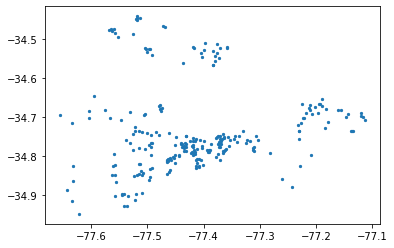

In [398]:
# plotting data points
fig = plt.figure(figsize=(6,4))
plt.scatter(-RA_Out.x, -RA_Out.y,s=5, cmap=rcc)

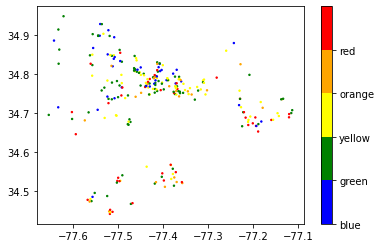

In [397]:
#Damage Scenario Plot
x = RA_Out.x*1
y = RA_Out.y
label = RA_Out.dmg
#None, Minor, Moderate, Extensive, Collapse
colors = ['blue','green','yellow','orange','red']

fig = plt.figure(figsize=(6,4))
plt.scatter(-x,y, c=label, cmap=matplotlib.colors.ListedColormap(colors),s=2)

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

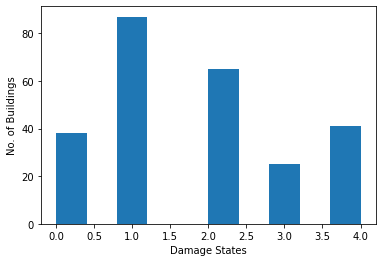

In [395]:
#Damage States Summary
dmg.dmg.hist()
plt.xlabel('Damage States')
plt.ylabel('No. of Buildings')
plt.grid(False)